# Feature thoughts

## Atom manipulation

A direction we want to go in is also atom manipulation in a robust manner. To this end we need a set of methods that can access atom and manipulate them.

#### How to access atoms?

In [1]:
import pyscal.crystal_structures as pcs
from pyscal.core import System
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
atoms, box = pcs.make_crystal(structure="fcc", repetitions=(5,5,5))

In [3]:
atoms,box

({'positions': [[0.0, 0.0, 0.0],
   [0.5, 0.0, 0.5],
   [0.0, 0.5, 0.5],
   [0.5, 0.5, 0.0],
   [0.0, 0.0, 1.0],
   [0.5, 0.0, 1.5],
   [0.0, 0.5, 1.5],
   [0.5, 0.5, 1.0],
   [0.0, 0.0, 2.0],
   [0.5, 0.0, 2.5],
   [0.0, 0.5, 2.5],
   [0.5, 0.5, 2.0],
   [0.0, 0.0, 3.0],
   [0.5, 0.0, 3.5],
   [0.0, 0.5, 3.5],
   [0.5, 0.5, 3.0],
   [0.0, 0.0, 4.0],
   [0.5, 0.0, 4.5],
   [0.0, 0.5, 4.5],
   [0.5, 0.5, 4.0],
   [0.0, 1.0, 0.0],
   [0.5, 1.0, 0.5],
   [0.0, 1.5, 0.5],
   [0.5, 1.5, 0.0],
   [0.0, 1.0, 1.0],
   [0.5, 1.0, 1.5],
   [0.0, 1.5, 1.5],
   [0.5, 1.5, 1.0],
   [0.0, 1.0, 2.0],
   [0.5, 1.0, 2.5],
   [0.0, 1.5, 2.5],
   [0.5, 1.5, 2.0],
   [0.0, 1.0, 3.0],
   [0.5, 1.0, 3.5],
   [0.0, 1.5, 3.5],
   [0.5, 1.5, 3.0],
   [0.0, 1.0, 4.0],
   [0.5, 1.0, 4.5],
   [0.0, 1.5, 4.5],
   [0.5, 1.5, 4.0],
   [0.0, 2.0, 0.0],
   [0.5, 2.0, 0.5],
   [0.0, 2.5, 0.5],
   [0.5, 2.5, 0.0],
   [0.0, 2.0, 1.0],
   [0.5, 2.0, 1.5],
   [0.0, 2.5, 1.5],
   [0.5, 2.5, 1.0],
   [0.0, 2.0, 2.0],
   [0.5

Atoms are dicts. Thats fine. Atoms could be class inherited from dict, so we have extra methods that are useful. Lets try this approach. But first we do a simple calculation to benchmark the speed.

In [4]:
class Atoms(dict):
    def __init__(self):
        pass
    
    @property
    def positions(self):
        return self["positions"]

In [5]:
rep = 5
atoms, box = pcs.make_crystal(structure="fcc", repetitions=(rep,rep,rep))

In [6]:
sys = System()
sys.box = box
sys.atoms = atoms

In [44]:
%%timeit
sys.find_neighbors(method="cutoff", cutoff=0)

373 ms ± 8.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [45]:
at = Atoms()
for key, val in atoms.items():
    at[key] = val

In [47]:
at.positions

[[0.0, 0.0, 0.0],
 [0.5, 0.0, 0.5],
 [0.0, 0.5, 0.5],
 [0.5, 0.5, 0.0],
 [0.0, 0.0, 1.0],
 [0.5, 0.0, 1.5],
 [0.0, 0.5, 1.5],
 [0.5, 0.5, 1.0],
 [0.0, 0.0, 2.0],
 [0.5, 0.0, 2.5],
 [0.0, 0.5, 2.5],
 [0.5, 0.5, 2.0],
 [0.0, 0.0, 3.0],
 [0.5, 0.0, 3.5],
 [0.0, 0.5, 3.5],
 [0.5, 0.5, 3.0],
 [0.0, 0.0, 4.0],
 [0.5, 0.0, 4.5],
 [0.0, 0.5, 4.5],
 [0.5, 0.5, 4.0],
 [0.0, 0.0, 5.0],
 [0.5, 0.0, 5.5],
 [0.0, 0.5, 5.5],
 [0.5, 0.5, 5.0],
 [0.0, 0.0, 6.0],
 [0.5, 0.0, 6.5],
 [0.0, 0.5, 6.5],
 [0.5, 0.5, 6.0],
 [0.0, 0.0, 7.0],
 [0.5, 0.0, 7.5],
 [0.0, 0.5, 7.5],
 [0.5, 0.5, 7.0],
 [0.0, 0.0, 8.0],
 [0.5, 0.0, 8.5],
 [0.0, 0.5, 8.5],
 [0.5, 0.5, 8.0],
 [0.0, 0.0, 9.0],
 [0.5, 0.0, 9.5],
 [0.0, 0.5, 9.5],
 [0.5, 0.5, 9.0],
 [0.0, 0.0, 10.0],
 [0.5, 0.0, 10.5],
 [0.0, 0.5, 10.5],
 [0.5, 0.5, 10.0],
 [0.0, 0.0, 11.0],
 [0.5, 0.0, 11.5],
 [0.0, 0.5, 11.5],
 [0.5, 0.5, 11.0],
 [0.0, 1.0, 0.0],
 [0.5, 1.0, 0.5],
 [0.0, 1.5, 0.5],
 [0.5, 1.5, 0.0],
 [0.0, 1.0, 1.0],
 [0.5, 1.0, 1.5],
 [0.0, 1.5, 1.5],
 [

In [48]:
sys2 = System()
sys2.box = box
sys2.atoms = at

In [49]:
%%timeit
sys2.find_neighbors(method="cutoff", cutoff=0)

406 ms ± 27.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
at.head = sys2

In [51]:
at.mapdict = {"ghostx":"ghost"}

In [56]:
at.keys()

dict_keys(['positions', 'ids', 'types', 'ghost', 'mask_1', 'mask_2', 'condition', 'head', 'neighbors', 'neighbordist', 'temp_neighbors', 'temp_neighbordist', 'neighborweight', 'diff', 'r', 'theta', 'phi', 'cutoff'])

In [2]:
repetitions = [2, 5, 7, 10, 12]
at_dict = [68.9, 31.6, 68, 258, 449]
at_class = [73, 32.5, 70, 250, 441]

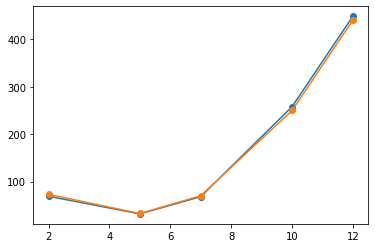

In [10]:
plt.plot(repetitions, at_dict, "-o");
plt.plot(repetitions, at_class, "-o");

This is quite nice and fine; the way therefore is to draft a new class with convenient properties aimed at the user. 

In [11]:
class Atoms(dict):
    def __init__(self, *args, **kwargs):
        self.update(*args, **kwargs)

    def __getitem__(self, key):
        if isinstance(key, slice):
            return self._get_atoms(key)
        elif isinstance(key, int):
            return self._get_atoms(key)
        else:
            val = dict.__getitem__(self, key)
            return val

    def __setitem__(self, key, val):
        dict.__setitem__(self, key, val)

    def __repr__(self):
        dictrepr = dict.__repr__(self)
        return '%s(%s)' % (type(self).__name__, dictrepr)
        
    def update(self, *args, **kwargs):
        for k, v in dict(*args, **kwargs).items():
            self[k] = v
    
    def _get_atoms(self, index):
        atom_dict = {}
        for key in self.keys():
            atom_dict[key] = self[key][index]
        return atom_dict        

Speedtest this class

In [20]:
rep = 12
atoms, box = pcs.make_crystal(structure="fcc", repetitions=(rep,rep,rep))
at = Atoms()
for key, val in atoms.items():
    at[key] = val
sys = System()
sys.box = box
sys.atoms = atoms

In [21]:
%%timeit
sys.find_neighbors(method="cutoff", cutoff=0)

473 ms ± 44.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
at_class_v2 = [72, 32, 68, 260, 473]

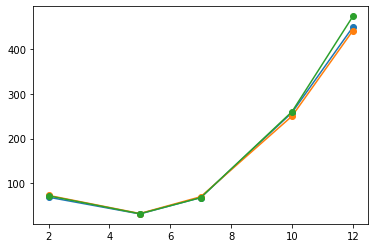

In [23]:
plt.plot(repetitions, at_dict, "-o");
plt.plot(repetitions, at_class, "-o");
plt.plot(repetitions, at_class_v2, "-o");

It is not particularly more expensive, we go with this definition and extend it.

We have to use the very new type-converted class and see if it affects the speed

In [34]:
rep = 10
atoms, box = pcs.make_crystal(structure="bcc", lattice_constant=3.147, repetitions=(rep,rep,rep))
sys = System()
sys.box = box
sys.atoms = atoms
atoms.natoms

2000

In [35]:
sys.find_neighbors(method="cutoff", cutoff=0)

In [38]:
type(sys.atoms["positions"])

pyscal.attributes.MyList

In [17]:
at_class_v3 = [1.6, 6.21, 17.6] 

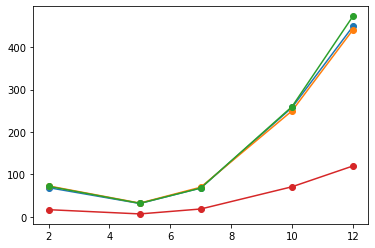

In [18]:
plt.plot(repetitions, at_dict, "-o");
plt.plot(repetitions, at_class, "-o");
plt.plot(repetitions, at_class_v2, "-o");
plt.plot(repetitions, at_class_v3, "-o");